# not MNIST

In [1]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [8]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([paths[i].split('/')[2] for i in range(len(paths))])
print(독립.shape, 종속.shape)
독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)

print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)
(18724, 28, 28) (18724, 10)


In [9]:
#모델

X = tf.keras.layers.Input([28, 28, 1])

#
H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120,activation='swish')(H)
H = tf.keras.layers.Dense(84,activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss = 'categorical_crossentropy', metrics='accuracy')


In [10]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 10s 4ms/step - loss: 0.7455 - accuracy: 0.7786
Epoch 2/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2841 - accuracy: 0.9132
Epoch 3/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2050 - accuracy: 0.9396
Epoch 4/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1720 - accuracy: 0.9457
Epoch 5/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1476 - accuracy: 0.9545
Epoch 6/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1165 - accuracy: 0.9628
Epoch 7/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1006 - accuracy: 0.9676
Epoch 8/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0782 - accuracy: 0.9749
Epoch 9/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0671 - accuracy: 0.9798
Epoch 10/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0576 - accuracy: 0.982

In [12]:
종속[0:10]

,A,B,C,D,E,F,G,H,I,J
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0


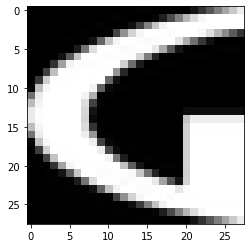

In [14]:
plt.imshow(독립[1], cmap='gray')